# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [1]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [2]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [4]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

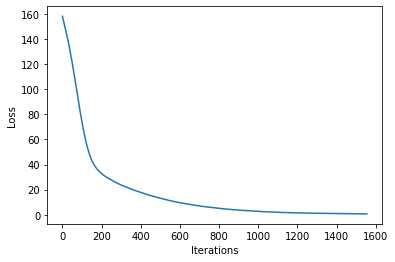

In [5]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

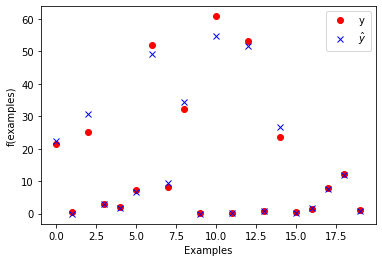

In [6]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?
 - There is 1 hidden layer, with 100 neurons
- What it is the algorithm used for training? Is there (any?) algorithm(s?) available that we mentioned during the courses?
 - Adam algorithm is used for training
 - SGD is available
- How does the training algorithm decides to stop the training?
 - When the score is not improving by at least 1e-4 for 10 consecutive iterations, convergence is considered to be reached and training stops.

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [7]:
# clean all previously defined variables for the sailing boats
%reset -f

In [8]:
"""Import the required modules"""
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
import pandas as pd

num_samples = 2000 # only use the first N samples to limit training time

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)[:num_samples]
y = cal_housing.target[:num_samples]

X.head(10) # print the first 10 values


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [10]:
sc = StandardScaler()
#Create new scalar to use for both X_test and X_train
X_trainFit = sc.fit(X_train)

#Since we are using the same scalar for the two transformation, we know that they have been transformed in the same way 
X_train = X_trainFit.transform(X_train)
X_test = X_trainFit.transform(X_test)


## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.

In [11]:
mlp = MLPRegressor(max_iter=7000, hidden_layer_sizes=(100,100,100,100), tol = 0.0000001, random_state = 1) # define the model, with default params
mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=7000,
             random_state=1, tol=1e-07)

In [12]:
mlp = MLPRegressor(max_iter=7000, hidden_layer_sizes=(100,100,100,100), tol = 0.0000001, random_state = 1) # define the model, with default params
mlp.fit(X_train, y_train)

print('Train score: ', mlp.score(X_train, y_train))
print('Train score: ', mlp.score(X_test, y_test))

Train score:  0.9593613129506738
Train score:  0.6886722141314139


In [13]:
data = []

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time


Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [217]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import time

activation = 'tanh'
early_stopping = False
max_iter = 3000
hidden_layer_sizes=(350,350,350,350,250)
tol = 0.001
random_state = 0

mlp = MLPRegressor(max_iter = max_iter, hidden_layer_sizes = hidden_layer_sizes, early_stopping = early_stopping, activation = activation, tol = tol, random_state = random_state) # define the model, with default params

start = time.time()
mlp.fit(X_train, y_train)
end = time.time()

data.append({'activation': activation, 'max_iter': max_iter, 'early_stopping': early_stopping, 'hidden_layers_sizes': hidden_layer_sizes, 'tol' : tol,'random_state':random_state,'time': end - start, 'test_score': mlp.score(X_test, y_test)})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,max_iter,early_stopping,hidden_layers_sizes,tol,test_score,random_state,time
17,tanh,5000,False,"(350, 350, 350, 350, 250)",1.000000e-03,0.821674,0.0,-
26,tanh,3000,False,"(350, 350, 350, 350, 250)",1.000000e-03,0.821674,0.0,29.330187
18,tanh,3000,False,"(350, 350, 350, 350, 250)",1.000000e-03,0.821674,0.0,-
25,tanh,3000,False,"(350, 350, 350, 350, 250)",1.000000e-04,0.819816,0.0,34.215221
24,tanh,3000,False,"(350, 350, 350, 350, 250)",1.000000e-04,0.819816,0.0,34.886514
19,tanh,3000,False,"(150, 150, 150, 150, 150, 150, 150, 150)",1.000000e-03,0.812808,0.0,-
12,tanh,5000,False,"(200, 200, 200, 200)",1.000000e-03,0.809065,0.0,-
14,tanh,5000,False,"(500, 500, 500, 500)",1.000000e-03,0.801871,0.0,-
11,tanh,5000,False,"(200, 200, 100, 100)",1.000000e-03,0.797018,0.0,-
23,tanh,3000,False,"(350, 350, 350, 350, 350)",1.000000e-04,0.796880,0.0,-


In [33]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
data = []
data.append({'activation': 'relu', 'max_iter': '500', 'test_score': 0.87})
data.append({'activation': 'tanh', 'max_iter': '200', 'early_stopping': False, 'test_score': 0.91})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model 
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection.

